# Example 1: Load CIFAR10 dataset

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 98s 1us/step


In [6]:
print("X_train shape:" + str(X_train.shape))
print(y_train.shape)

X_train shape:(50000, 32, 32, 3)
(50000, 1)


In [10]:
print("y_train shape:" + str(X_test.shape))
print(y_test.shape)

y_train shape:(10000, 28, 28)
(10000,)


# Example 2: Load MNIST dataset

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils  

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [4]:
print("X_train shape:" + str(X_train.shape))
print(y_train.shape)

X_train shape:(60000, 28, 28)
(60000,)


In [5]:
print("y_train shape:" + str(y_train.shape))
print(y_test.shape)

y_train shape:(60000,)
(10000,)


# Import pyplot to plot

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# View a record in dataset

8
(28, 28)


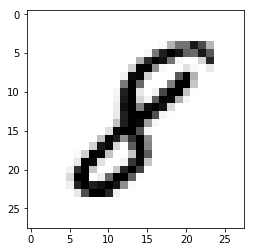

In [7]:
image_index = 7777

print(y_train[image_index])
print(X_train[image_index].shape)
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

## Data Engineering

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
X_train /= 255
X_test /= 255

In [11]:
y_TrainOneHot = np_utils.to_categorical(y_train)  
y_TestOneHot = np_utils.to_categorical(y_test)  
print(y_test[0])
print(y_TestOneHot[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])


X_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Training

In [13]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [14]:
input_shape = (28, 28, 1)

In [15]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5,5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
__________

(filter_height * filter_width * input_image_channels + 1) * number_of_filters

Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_3 (Conv2D)            (None, 24, 24, 8)         208          (5x5x1+1)x8 = 208
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 8)         0            
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          3216         (5x5x16+1)x16 = 3216
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896        128 x (256+1) = 32896
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290         10 x (128+1) = 1290
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
=================================================================
Total params: 37,610						    208+3216+32896+1290 = 37610
Trainable params: 37,610
Non-trainable params: 0

Non-trainable parameters指的是在訓練過程中無法透過更新weight來optimize自身值的parameters，反之則稱為Trainable parameters。這些Non-trainable parameters多產生於Batch Normaliztion的兩個參數：moving_mean及moving_variance.

1.	Training images的channel數目。 
2.	CNN kernel 的尺寸以及數目。
3.	CNN/Pooling時的圖片尺寸
4.	CNN、Dense等layer的層數（深度）
5.	Batch Normalization的次數
6.	Pooling（減少維度）layer數目
7.	輸出的classes數目。

至於用在training的圖片格式或類型對於最終的模型參數數目（維度）有沒有影響呢？例如BMP、JPG、PNG等不同的圖片格式，亦或灰階、Binary這些同為one channel的圖片。

從上述的parameter計算以及實際測試後證實，圖片格式或類型對模型維度是沒有影響的，因為它們改變的是data數量而非data的維度架構

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
train_history = model.fit(x=X_train,y=y_TrainOneHot, validation_split=0.2, validation_data=None, batch_size=50, epochs=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3480 - acc: 0.8936 - val_loss: 0.0823 - val_acc: 0.9746


In [18]:
print(train_history.history)

{'val_loss': [0.08227442216593772], 'val_acc': [0.9745833354691664], 'loss': [0.3480231603355302], 'acc': [0.8936041634141778]}


In [19]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

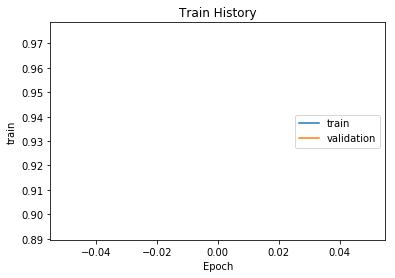

In [20]:
show_train_history(train_history, 'acc', 'val_acc')

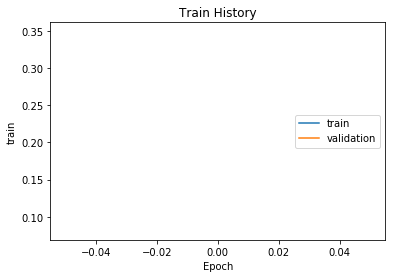

In [21]:
show_train_history(train_history, 'loss', 'val_loss')

In [22]:
test_error_rate = model.evaluate(X_test, y_TestOneHot, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: [0.07187001135647297, 0.9782]


In [23]:
from keras import models

#Export
model.save("trained_model.h5")

#Import
trained_model = models.load_model("trained_model.h5")

(28, 28, 3)


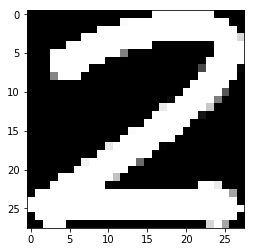

(1, 28, 28, 1)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
import cv2
img = cv2.imread("2.png")
img = cv2.resize(img, (28, 28)) 
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='Greys')
plt.show()
img = img.reshape(1, 28, 28, 1)
print(img.shape)
predictions = trained_model.predict(img)
print(predictions)
